<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os ,re
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords

In [2]:
os.chdir('C:\\Users\\Ibney naseem\\Desktop\\NLP_Research_internships')

In [3]:
nlp = pd.read_csv('all_tickets-1551435513304.csv',encoding='latin-1')

In [4]:
nlp.shape

(48549, 9)

In [5]:
nlp.head(3).T

,0,1,2
title,NaN,connection with icon,work experience user
body,hi since recruiter lead permission approve req...,icon dear please setup icon per icon engineers...,work experience user hi work experience studen...
ticket_type,1,1,1
category,4,6,5
sub_category1,2,22,13
sub_category2,21,7,7
business_service,71,26,32
urgency,3,3,3
impact,4,4,4


In [6]:
raw_data = nlp.loc[:,['body','urgency']]

In [7]:
raw_data.head(3)

,body,urgency
0,hi since recruiter lead permission approve req...,3
1,icon dear please setup icon per icon engineers...,3
2,work experience user hi work experience studen...,3


In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
##Function to remove punctuations:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct
raw_data['body_text_clean'] = raw_data['body'].apply(lambda x: remove_punct(x))

raw_data.head()

,body,urgency,body_text_clean
0,hi since recruiter lead permission approve req...,3,hi since recruiter lead permission approve req...
1,icon dear please setup icon per icon engineers...,3,icon dear please setup icon per icon engineers...
2,work experience user hi work experience studen...,3,work experience user hi work experience studen...
3,requesting meeting hi please help follow equip...,3,requesting meeting hi please help follow equip...
4,re expire days hi ask help update passwords co...,3,re expire days hi ask help update passwords co...


In [10]:
import re
#Function to tokenize words:
def tokenize(text):
    tokens = re.split('\W', text)
    return tokens

raw_data['body_text_tokenized'] = raw_data['body_text_clean'].apply(lambda x: tokenize(x.lower()))
raw_data.head()

,body,urgency,body_text_clean,body_text_tokenized
0,hi since recruiter lead permission approve req...,3,hi since recruiter lead permission approve req...,"[hi, since, recruiter, lead, permission, appro..."
1,icon dear please setup icon per icon engineers...,3,icon dear please setup icon per icon engineers...,"[icon, dear, please, setup, icon, per, icon, e..."
2,work experience user hi work experience studen...,3,work experience user hi work experience studen...,"[work, experience, user, hi, work, experience,..."
3,requesting meeting hi please help follow equip...,3,requesting meeting hi please help follow equip...,"[requesting, meeting, hi, please, help, follow..."
4,re expire days hi ask help update passwords co...,3,re expire days hi ask help update passwords co...,"[re, expire, days, hi, ask, help, update, pass..."


In [11]:
##Removing Stop Words:
stopword = nltk.corpus.stopwords.words('english') #All english stopwords

In [12]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword] #to remove all stopwords
    return text

raw_data['body_text_nostop'] = raw_data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

raw_data.head()

,body,urgency,body_text_clean,body_text_tokenized,body_text_nostop
0,hi since recruiter lead permission approve req...,3,hi since recruiter lead permission approve req...,"[hi, since, recruiter, lead, permission, appro...","[hi, since, recruiter, lead, permission, appro..."
1,icon dear please setup icon per icon engineers...,3,icon dear please setup icon per icon engineers...,"[icon, dear, please, setup, icon, per, icon, e...","[icon, dear, please, setup, icon, per, icon, e..."
2,work experience user hi work experience studen...,3,work experience user hi work experience studen...,"[work, experience, user, hi, work, experience,...","[work, experience, user, hi, work, experience,..."
3,requesting meeting hi please help follow equip...,3,requesting meeting hi please help follow equip...,"[requesting, meeting, hi, please, help, follow...","[requesting, meeting, hi, please, help, follow..."
4,re expire days hi ask help update passwords co...,3,re expire days hi ask help update passwords co...,"[re, expire, days, hi, ask, help, update, pass...","[expire, days, hi, ask, help, update, password..."


In [13]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

raw_data['body_text_stemmed'] = raw_data['body_text_nostop'].apply(lambda x: stemming(x))

raw_data.head()

,body,urgency,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,hi since recruiter lead permission approve req...,3,hi since recruiter lead permission approve req...,"[hi, since, recruiter, lead, permission, appro...","[hi, since, recruiter, lead, permission, appro...","[hi, sinc, recruit, lead, permiss, approv, req..."
1,icon dear please setup icon per icon engineers...,3,icon dear please setup icon per icon engineers...,"[icon, dear, please, setup, icon, per, icon, e...","[icon, dear, please, setup, icon, per, icon, e...","[icon, dear, pleas, setup, icon, per, icon, en..."
2,work experience user hi work experience studen...,3,work experience user hi work experience studen...,"[work, experience, user, hi, work, experience,...","[work, experience, user, hi, work, experience,...","[work, experi, user, hi, work, experi, student..."
3,requesting meeting hi please help follow equip...,3,requesting meeting hi please help follow equip...,"[requesting, meeting, hi, please, help, follow...","[requesting, meeting, hi, please, help, follow...","[request, meet, hi, pleas, help, follow, equip..."
4,re expire days hi ask help update passwords co...,3,re expire days hi ask help update passwords co...,"[re, expire, days, hi, ask, help, update, pass...","[expire, days, hi, ask, help, update, password...","[expir, day, hi, ask, help, updat, password, c..."


In [14]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

raw_data['body_text_lemma'] = raw_data['body_text_nostop'].apply(lambda x: lemmatizing(x))

raw_data.head()

,body,urgency,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemma
0,hi since recruiter lead permission approve req...,3,hi since recruiter lead permission approve req...,"[hi, since, recruiter, lead, permission, appro...","[hi, since, recruiter, lead, permission, appro...","[hi, sinc, recruit, lead, permiss, approv, req...","[hi, since, recruiter, lead, permission, appro..."
1,icon dear please setup icon per icon engineers...,3,icon dear please setup icon per icon engineers...,"[icon, dear, please, setup, icon, per, icon, e...","[icon, dear, please, setup, icon, per, icon, e...","[icon, dear, pleas, setup, icon, per, icon, en...","[icon, dear, please, setup, icon, per, icon, e..."
2,work experience user hi work experience studen...,3,work experience user hi work experience studen...,"[work, experience, user, hi, work, experience,...","[work, experience, user, hi, work, experience,...","[work, experi, user, hi, work, experi, student...","[work, experience, user, hi, work, experience,..."
3,requesting meeting hi please help follow equip...,3,requesting meeting hi please help follow equip...,"[requesting, meeting, hi, please, help, follow...","[requesting, meeting, hi, please, help, follow...","[request, meet, hi, pleas, help, follow, equip...","[requesting, meeting, hi, please, help, follow..."
4,re expire days hi ask help update passwords co...,3,re expire days hi ask help update passwords co...,"[re, expire, days, hi, ask, help, update, pass...","[expire, days, hi, ask, help, update, password...","[expir, day, hi, ask, help, updat, password, c...","[expire, day, hi, ask, help, update, password,..."


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(raw_data['body'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(48549, 12258)
['ab', 'abandon', 'abandoned', 'abbott', 'abbreviations', 'abc', 'abeam', 'abilities', 'ability', 'able', 'abnormal', 'abnormally', 'abo', 'aboard', 'abort', 'aborted', 'aborting', 'about', 'above', 'abroad', 'abs', 'absence', 'absences', 'absent', 'absolute', 'absolutely', 'absorption', 'abstract', 'absurd', 'absurdly', 'abuse', 'abused', 'ac', 'academic', 'academy', 'accelerate', 'accelerated', 'accelerates', 'acceleration', 'accelerator', 'accelerometer', 'accept', 'acceptable', 'acceptance', 'acceptances', 'acceptation', 'accepted', 'accepting', 'accepts', 'access', 'accessability', 'accessed', 'accesses', 'accessibility', 'accessible', 'accessing', 'accession', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'acclaimed', 'accommodate', 'accommodated', 'accommodation', 'accompanied', 'accompanying', 'accomplish', 'accomplished', 'accomplishment', 'accord', 'accordance', 'according', 'accordingly', 'accountable', 'accountancy', 'accountant', 'acc

In [16]:
##Apply CountVectorizer:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer()
X_counts = ngram_vect.fit_transform(raw_data['body'])
X_counts.shape
ngram_vect.get_feature_names()

['ab',
 'abandon',
 'abandoned',
 'abbott',
 'abbreviations',
 'abc',
 'abeam',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'abnormally',
 'abo',
 'aboard',
 'abort',
 'aborted',
 'aborting',
 'about',
 'above',
 'abroad',
 'abs',
 'absence',
 'absences',
 'absent',
 'absolute',
 'absolutely',
 'absorption',
 'abstract',
 'absurd',
 'absurdly',
 'abuse',
 'abused',
 'ac',
 'academic',
 'academy',
 'accelerate',
 'accelerated',
 'accelerates',
 'acceleration',
 'accelerator',
 'accelerometer',
 'accept',
 'acceptable',
 'acceptance',
 'acceptances',
 'acceptation',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessability',
 'accessed',
 'accesses',
 'accessibility',
 'accessible',
 'accessing',
 'accession',
 'accessories',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acclaimed',
 'accommodate',
 'accommodated',
 'accommodation',
 'accompanied',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accord',
 'accordance',
 'according',
 'acc

In [17]:
X_counts.shape

(48549, 12258)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

In [19]:
X_tfidf = tfidf_vect.fit_transform(raw_data['body'])
X_tfidf.shape

(48549, 12258)

In [20]:
tfidf_vect.get_feature_names()

['ab',
 'abandon',
 'abandoned',
 'abbott',
 'abbreviations',
 'abc',
 'abeam',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'abnormally',
 'abo',
 'aboard',
 'abort',
 'aborted',
 'aborting',
 'about',
 'above',
 'abroad',
 'abs',
 'absence',
 'absences',
 'absent',
 'absolute',
 'absolutely',
 'absorption',
 'abstract',
 'absurd',
 'absurdly',
 'abuse',
 'abused',
 'ac',
 'academic',
 'academy',
 'accelerate',
 'accelerated',
 'accelerates',
 'acceleration',
 'accelerator',
 'accelerometer',
 'accept',
 'acceptable',
 'acceptance',
 'acceptances',
 'acceptation',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessability',
 'accessed',
 'accesses',
 'accessibility',
 'accessible',
 'accessing',
 'accession',
 'accessories',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acclaimed',
 'accommodate',
 'accommodated',
 'accommodation',
 'accompanied',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accord',
 'accordance',
 'according',
 'acc

In [21]:
import string
#function to calculate length of words excluding space:
raw_data['body_len'] = raw_data['body'].apply(lambda x: len(x) - x.count(''))
raw_data.head()

,body,urgency,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemma,body_len
0,hi since recruiter lead permission approve req...,3,hi since recruiter lead permission approve req...,"[hi, since, recruiter, lead, permission, appro...","[hi, since, recruiter, lead, permission, appro...","[hi, sinc, recruit, lead, permiss, approv, req...","[hi, since, recruiter, lead, permission, appro...",-1
1,icon dear please setup icon per icon engineers...,3,icon dear please setup icon per icon engineers...,"[icon, dear, please, setup, icon, per, icon, e...","[icon, dear, please, setup, icon, per, icon, e...","[icon, dear, pleas, setup, icon, per, icon, en...","[icon, dear, please, setup, icon, per, icon, e...",-1
2,work experience user hi work experience studen...,3,work experience user hi work experience studen...,"[work, experience, user, hi, work, experience,...","[work, experience, user, hi, work, experience,...","[work, experi, user, hi, work, experi, student...","[work, experience, user, hi, work, experience,...",-1
3,requesting meeting hi please help follow equip...,3,requesting meeting hi please help follow equip...,"[requesting, meeting, hi, please, help, follow...","[requesting, meeting, hi, please, help, follow...","[request, meet, hi, pleas, help, follow, equip...","[requesting, meeting, hi, please, help, follow...",-1
4,re expire days hi ask help update passwords co...,3,re expire days hi ask help update passwords co...,"[re, expire, days, hi, ask, help, update, pass...","[expire, days, hi, ask, help, update, password...","[expir, day, hi, ask, help, updat, password, c...","[expire, day, hi, ask, help, update, password,...",-1


In [22]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count('')),3)*100

raw_data['punct%'] = raw_data['body'].apply(lambda x: count_punct(x))
raw_data.head()

,body,urgency,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemma,body_len,punct%
0,hi since recruiter lead permission approve req...,3,hi since recruiter lead permission approve req...,"[hi, since, recruiter, lead, permission, appro...","[hi, since, recruiter, lead, permission, appro...","[hi, sinc, recruit, lead, permiss, approv, req...","[hi, since, recruiter, lead, permission, appro...",-1,-0.0
1,icon dear please setup icon per icon engineers...,3,icon dear please setup icon per icon engineers...,"[icon, dear, please, setup, icon, per, icon, e...","[icon, dear, please, setup, icon, per, icon, e...","[icon, dear, pleas, setup, icon, per, icon, en...","[icon, dear, please, setup, icon, per, icon, e...",-1,-0.0
2,work experience user hi work experience studen...,3,work experience user hi work experience studen...,"[work, experience, user, hi, work, experience,...","[work, experience, user, hi, work, experience,...","[work, experi, user, hi, work, experi, student...","[work, experience, user, hi, work, experience,...",-1,-0.0
3,requesting meeting hi please help follow equip...,3,requesting meeting hi please help follow equip...,"[requesting, meeting, hi, please, help, follow...","[requesting, meeting, hi, please, help, follow...","[request, meet, hi, pleas, help, follow, equip...","[requesting, meeting, hi, please, help, follow...",-1,-0.0
4,re expire days hi ask help update passwords co...,3,re expire days hi ask help update passwords co...,"[re, expire, days, hi, ask, help, update, pass...","[expire, days, hi, ask, help, update, password...","[expir, day, hi, ask, help, updat, password, c...","[expire, day, hi, ask, help, update, password,...",-1,-0.0


In [23]:
y=raw_data.urgency

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                  # converts the character array to numeric array. Assigns levels to unique labels.
le.fit(y)
train_labels = le.transform(y)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))


[0 1 2 3]
(array([0, 1, 2, 3], dtype=int64), array([ 1652,  6748,  5528, 34621], dtype=int64))


In [25]:
from keras.utils import to_categorical

labels_train = to_categorical(np.asarray(train_labels))

print('Shape of data tensor:', y.shape)
print('Shape of trian label tensor:', labels_train.shape)


Using TensorFlow backend.


Shape of data tensor: (48549,)
Shape of trian label tensor: (48549, 4)


In [26]:
#Model Building:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
params = {'n_estimators':[10,100],
          'max_depth':[15,25]}
gs = GridSearchCV(rfc,params,cv=3,n_jobs=-1)
gs_fit = gs.fit(X_counts, y)


In [27]:
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False).head()

C:\Users\Ibney naseem\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Ibney naseem\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Ibney naseem\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Ibney naseem\Anaconda3\li

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
3,25.355261,0.497998,0.658269,0.031998,25,100,"{'max_depth': 25, 'n_estimators': 100}",0.826630,0.834950,0.833199,0.831593,0.003582,1,0.911661,0.902892,0.913155,0.909236,0.004527
2,2.835478,0.093917,0.116400,0.008153,25,10,"{'max_depth': 25, 'n_estimators': 10}",0.813840,0.836557,0.832396,0.827597,0.009876,2,0.893153,0.899957,0.897368,0.896826,0.002804
0,1.551005,0.114164,0.109534,0.000471,15,10,"{'max_depth': 15, 'n_estimators': 10}",0.814952,0.803559,0.800569,0.806361,0.006197,3,0.854962,0.826608,0.823220,0.834930,0.014232
1,14.656317,0.680305,0.651635,0.068539,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.791659,0.799666,0.818491,0.803271,0.011247,4,0.838741,0.827844,0.839039,0.835208,0.005208


In [28]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, random_state=1, test_size=0.30, stratify=y )

In [33]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (33984, 12258)
X_test (14565, 12258)
y_train (33984,)
y_test (14565,)


In [50]:
###RF:
rfc = RandomForestClassifier(n_estimators=177,min_samples_split=6,
                                              criterion='gini', 
                                              max_features='auto',
                                              oob_score=True,
                                              random_state=1,
                                              n_jobs=-1)
gr = rfc.fit(X_train,y_train)
print('Random Forest Classifier Train Score:',rfc.score(X_train,y_train))
print('Random Forest Classifier Test Score:',rfc.score(X_test,y_test))

Random Forest Classifier Train Score: 0.996616054613936
Random Forest Classifier Test Score: 0.8734637830415379


In [51]:
#predicting on train and test data
y_rf_pred_test = rfc.predict(X_test)
y_rf_pred_train = rfc.predict(X_train)
print(classification_report(y_train, y_rf_pred_train))
print(classification_report(y_test, y_rf_pred_test))
print(accuracy_score(y_test, y_rf_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1156
           1       0.99      0.99      0.99      4724
           2       0.99      0.99      0.99      3870
           3       1.00      1.00      1.00     24234

   micro avg       1.00      1.00      1.00     33984
   macro avg       1.00      0.99      0.99     33984
weighted avg       1.00      1.00      1.00     33984

              precision    recall  f1-score   support

           0       0.69      0.05      0.09       496
           1       0.55      0.83      0.66      2024
           2       0.64      0.38      0.47      1658
           3       0.99      1.00      1.00     10387

   micro avg       0.87      0.87      0.87     14565
   macro avg       0.72      0.57      0.56     14565
weighted avg       0.88      0.87      0.86     14565

0.8734637830415379


[[   25   389    69    13]
 [    7  1687   286    44]
 [    4   998   624    32]
 [    0     0     1 10386]]


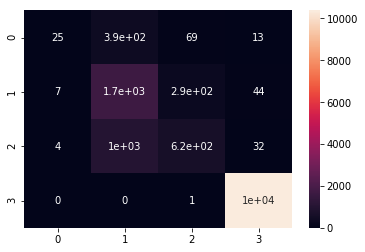

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cm=confusion_matrix(y_test,y_rf_pred_test)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [53]:
##Checking recall:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_rf_pred_test,pos_label=1,average='micro'))

0.8734637830415379
